<a href="https://colab.research.google.com/github/niikhill/AI-ML-Class/blob/main/DP1_and_DP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mlxtend --upgrade

You should consider upgrading via the 'c:\users\nikhil\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
# QDP1  Load the Boston housing dataset directly via URL, “https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv” and split it into train and test sets,
# then estimates the mean squared error (MSE) for a linear regression as well as the bias and variance for the model error over 200 bootstrap samples.
# Estimate the bias and variance for the regression model?
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp

# load data set
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)

# Seprate into input and output values
data = dataframe.values
X, y = data[:, :-1], data[:, -1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1)
# Define the model
model = LinearRegression()
# Estimate bias and variance

mse, bias, var = bias_variance_decomp(
    model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# Summarize result

print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)


MSE: 22.418
Bias: 20.744
Variance: 1.674


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

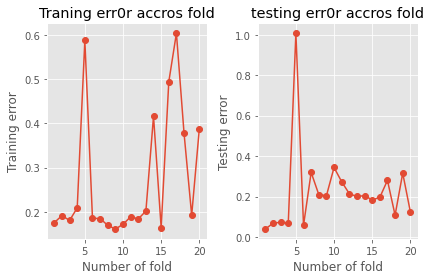

In [ ]:
# DP2
# Use the Iris Dataset of CP1. The dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).use KFolds cross-validation with 20 folds (K=20) to evaluate the generalization ability of our model.
# Within each fold we will estimate the training and test error using the training and test sets, respectively.
# Plot the MAE of the training phase and the MAE of the testing phase. Interpret the results and try to spot the overfitting and underfitting points?

from pandas import read_csv
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

np.random.seed(0)
plt.style.use('ggplot')
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# iris = read_csv(url,header=None)
iris = load_iris()
X, y = iris.data, iris.target
kf = KFold(n_splits=20)
list_training_error = []
list_testing_error = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = MLPRegressor()
    model.fit(X_train, y_train)
    y_train_data_pred = model.predict(X_train)
    y_test_data_pred = model.predict(X_test)
    fold_training_error = mean_absolute_error(y_train, y_train_data_pred)
    fold_testing_error = mean_absolute_error(y_test, y_test_data_pred)
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error)
    plt.subplot(1, 2, 1)
plt.plot(range(1, kf.get_n_splits()+1),
         np.array(list_training_error).ravel(), 'o-')
plt.xlabel('Number of fold')
plt.ylabel('Training error')
plt.title('Traning err0r accros fold')
plt.tight_layout()
plt.subplot(1, 2, 2)
plt.plot(range(1, kf.get_n_splits()+1),
         np.array(list_testing_error).ravel(), 'o-')
plt.xlabel('Number of fold')
plt.ylabel('Testing error')
plt.title('testing err0r accros fold')
plt.tight_layout()
plt.show()
